In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

listColumnas = []

In [193]:
df = pd.read_csv("Estadísticas de Casos Sometidos.csv")
# df = pd.read_excel("Estadísticas de Casos Sometidos.xlsx")
# df.drop(columns='Delito|Provincia|Cantidad|Mes|Año')


In [154]:
def limpiar_datos (expresionRegular: str, palabra_clave: str):
    global df
    global listColumnas
    
    condicion = df["Delito"].str.contains(expresionRegular)
    df.loc[condicion, "Delito"] = palabra_clave
    listColumnas.append(palabra_clave)

In [194]:
dictCrimenes = {
    "Reincidencia": 
        r'[Rr]eincidencia',
    "Delitos menores": 
        r'[Nn]aturaleza|Alimentos Y Las Necesidades|[Jj]uego|[Qq]uerella|secre|[Cc]onducci',
    "Intento de crimen": 
        r'[Ii]ntent',
    'Amenaza': 
        r'[Aa]menaza',
    "Asociación/Cómplice en un crimen": 
        r'[Aa]sociaci|[Cc][óo¢]mplice|[Cc]omplic',
    'Robo': 
        r'[Rr]obo|[Pp]enetr|[Aa]traco',
    "Delitos sexuales": 
        r'[Ss]exua|[Ii]ncesto|[Aa]cos|[Pp]roxenetismo|[Pp]rostituc|[Pp]ornograf[íi¢]a|[Ss]educc',
    "Delitos sobre alimentos": 
        r'[Aa]limen',
    'Violencia': 
        r'[Vv]iolencia|[Gg]olpe|[Aa]gresi|[Dd]años? [Gg]r',
    "Tentativa de crimen": 
        r'[Tt]entativa|[Dd]ifamac|[Ii]ncit',
    'Posesión de drogas': 
        r'[Dd]roga|[Mm]arihuana|[Cc]oca|[Ss]ustancia|[Hh]ookah',
    'Estafa': 
        r'[Ee]stafa|[Ff]alse|[Ff]als|[Cc]olora|[Ff]raud|[Rr]eproduzc|[Rr]egistra|[Ii]mitaci.?n ',
    'Homicidios y suicidios': 
        r'[Hh]omicidio|[Aa]sesinato|[Ii]nfantici|[Ee]nvenenamiento|[Ss]uicidio',
    'Secuestro o sustracción de personas o bienes': 
        r'[Ss]ecuestr|[Ss]ustracc',
    'Portación y uso de armas blancas y de fuego': 
        r'[Aa]rma|Delito de portac',
    'Abusos': 
        r'[Aa]buso',
    "Tráfico ilícito": 
        r'[Tt]r[aá]fico|[Tt]rata|[Cc]ontrab',
    "Detención o encierro ilegal": 
        r'Detenci[oó¢]|[Ee]ncierro', 
    "Accidentes": 
        r'[Aa]ccidentes', 
    'Daño a propiedad ajena': 
        r'[Aa]jen[ao]|[Dd]estrucci|[Oo]tro [Dd]ue[ñn]o',
    'Acceso ilícito de datos o servicios': 
        r'[Aa]cceso [Ii]l[í]cito',
    "Delitos electorales": 
        r'[Ee]lector',
    'Incendio': 
        r'[Ii]ncend',
    'Preservar medio ambiente': 
        r'[Pp]reser|[Aa]rroja',
    "Usurpación de funciones": 
        r'[Uu]surpac',
    "Delitos sobre alta tecnología": 
        r'[Aa]lta [Tt]|[Ll]ey [Dd]elito|[Uu]so [Dd]isposi',
    "Atentados": 
        r'Atentado|[Rr]ebel|[Tt]erroris',
    "Animales infectados": 
        r'[Ii]nfec',
    "Revocación de solicitudes o colocaciones": 
        r'[Rr]evocaci.n ',
    "Violación a las leyes y reglamentos": 
        r'[Vv]iola|[Ii]nfracc|[Nn]o [Rr]eal|[Ii]ncumpl|[Ll]ey|[Tt]rabajo [Rr]ealiza',
}

print("Total de delitos:", df["Delito"].value_counts().count())
for palabraClave, expresionRegular in dictCrimenes.items():
    limpiar_datos(expresionRegular, palabraClave)
    print(f"Total - {palabraClave} = {df['Delito'].value_counts().count()}")

Total de delitos: 5231
Total - Reincidencia = 5213
Total - Delitos menores = 5107
Total - Intento de crimen = 5084
Total - Amenaza = 4981
Total - Asociación/Cómplice en un crimen = 4865
Total - Robo = 4681
Total - Delitos sexuales = 4416
Total - Delitos sobre alimentos = 4375
Total - Violencia = 3902
Total - Tentativa de crimen = 3772
Total - Posesión de drogas = 3571
Total - Estafa = 3340
Total - Homicidios y suicidios = 3286
Total - Secuestro o sustracción de personas o bienes = 3227
Total - Portación y uso de armas blancas y de fuego = 2982
Total - Abusos = 2842
Total - Tráfico ilícito = 2758
Total - Detención o encierro ilegal = 2751
Total - Accidentes = 2706
Total - Daño a propiedad ajena = 2655
Total - Acceso ilícito de datos o servicios = 2614
Total - Delitos electorales = 2609
Total - Incendio = 2596
Total - Preservar medio ambiente = 2592
Total - Usurpación de funciones = 2588
Total - Delitos sobre alta tecnología = 2493
Total - Atentados = 2465
Total - Animales infectados = 2

In [172]:
def comprobarRegistros(expresionRegular):
    test = df[df["Delito"].str.contains(expresionRegular)]  
    df["Delito"].str.contains('Delitos sexual')
    
    for delitos in test["Delito"].unique():
        print(delitos)

In [ ]:
comprobarRegistros(r' ')

In [215]:
df_test = df[df["Delito"].isin(listColumnas) == False]
df_test["Delito"].value_counts()

Delito
Niñas Y Adolescente                                                                  327
Sanciones                                                                            211
Desaparicion                                                                         205
Estupro (331)                                                                        191
Calificación Premeditación (297)                                                     190
                                                                                    ... 
Cuan                                                                                   1
Vagancia Y Mendicidad - Código Penal                                                   1
Personas Con Derecho A Demandar Por A                                                  1
Conflictos Sobre Cumplimiento Criterios Asignación (articulo 137 Párrafo)              1
Sanciones A La Operación Sin Licencia De Operación O Rótulo De Identidad. Art. 44      1
Name: count, L

In [7]:
from pandas import DataFrame

def ajustesGraficos (df_grafico: DataFrame, agrupacion: str, umbralDelitos: int, tamanho: tuple, tipo: str, titulo: str, xLabel: str, yLabel: str):
    df_agrupado = df_grafico.groupby(agrupacion)['Cantidad'].sum()    
    df_filtrado = df_agrupado[df_agrupado >= umbralDelitos]
    
    plt.figure(figsize=tamanho)
    df_filtrado.sort_values(ascending=False).plot(kind=tipo)

    plt.title(titulo)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

def graficarDelitosProvincias (df: pd.DataFrame, provinciaSeleccionada: str, umbralDelitos: str, tamanho: tuple, tipo: str, xLabel: str, yLabel: str):
    df_provincia = df[df['Provincia'] == provinciaSeleccionada]

    titulo = f'Proporción de Delitos en {provinciaSeleccionada} con más de {umbralDelitos} casos'
    ajustesGraficos(df_provincia, "Delito", umbralDelitos, tamanho, tipo, titulo, xLabel, yLabel)

In [196]:
df_grafico = df[df["Delito"].isin(listColumnas)]

df_grafico['Cantidad'] = pd.to_numeric(df_grafico['Cantidad'], errors='coerce')
df_grafico = df_grafico.dropna(subset=['Cantidad'])

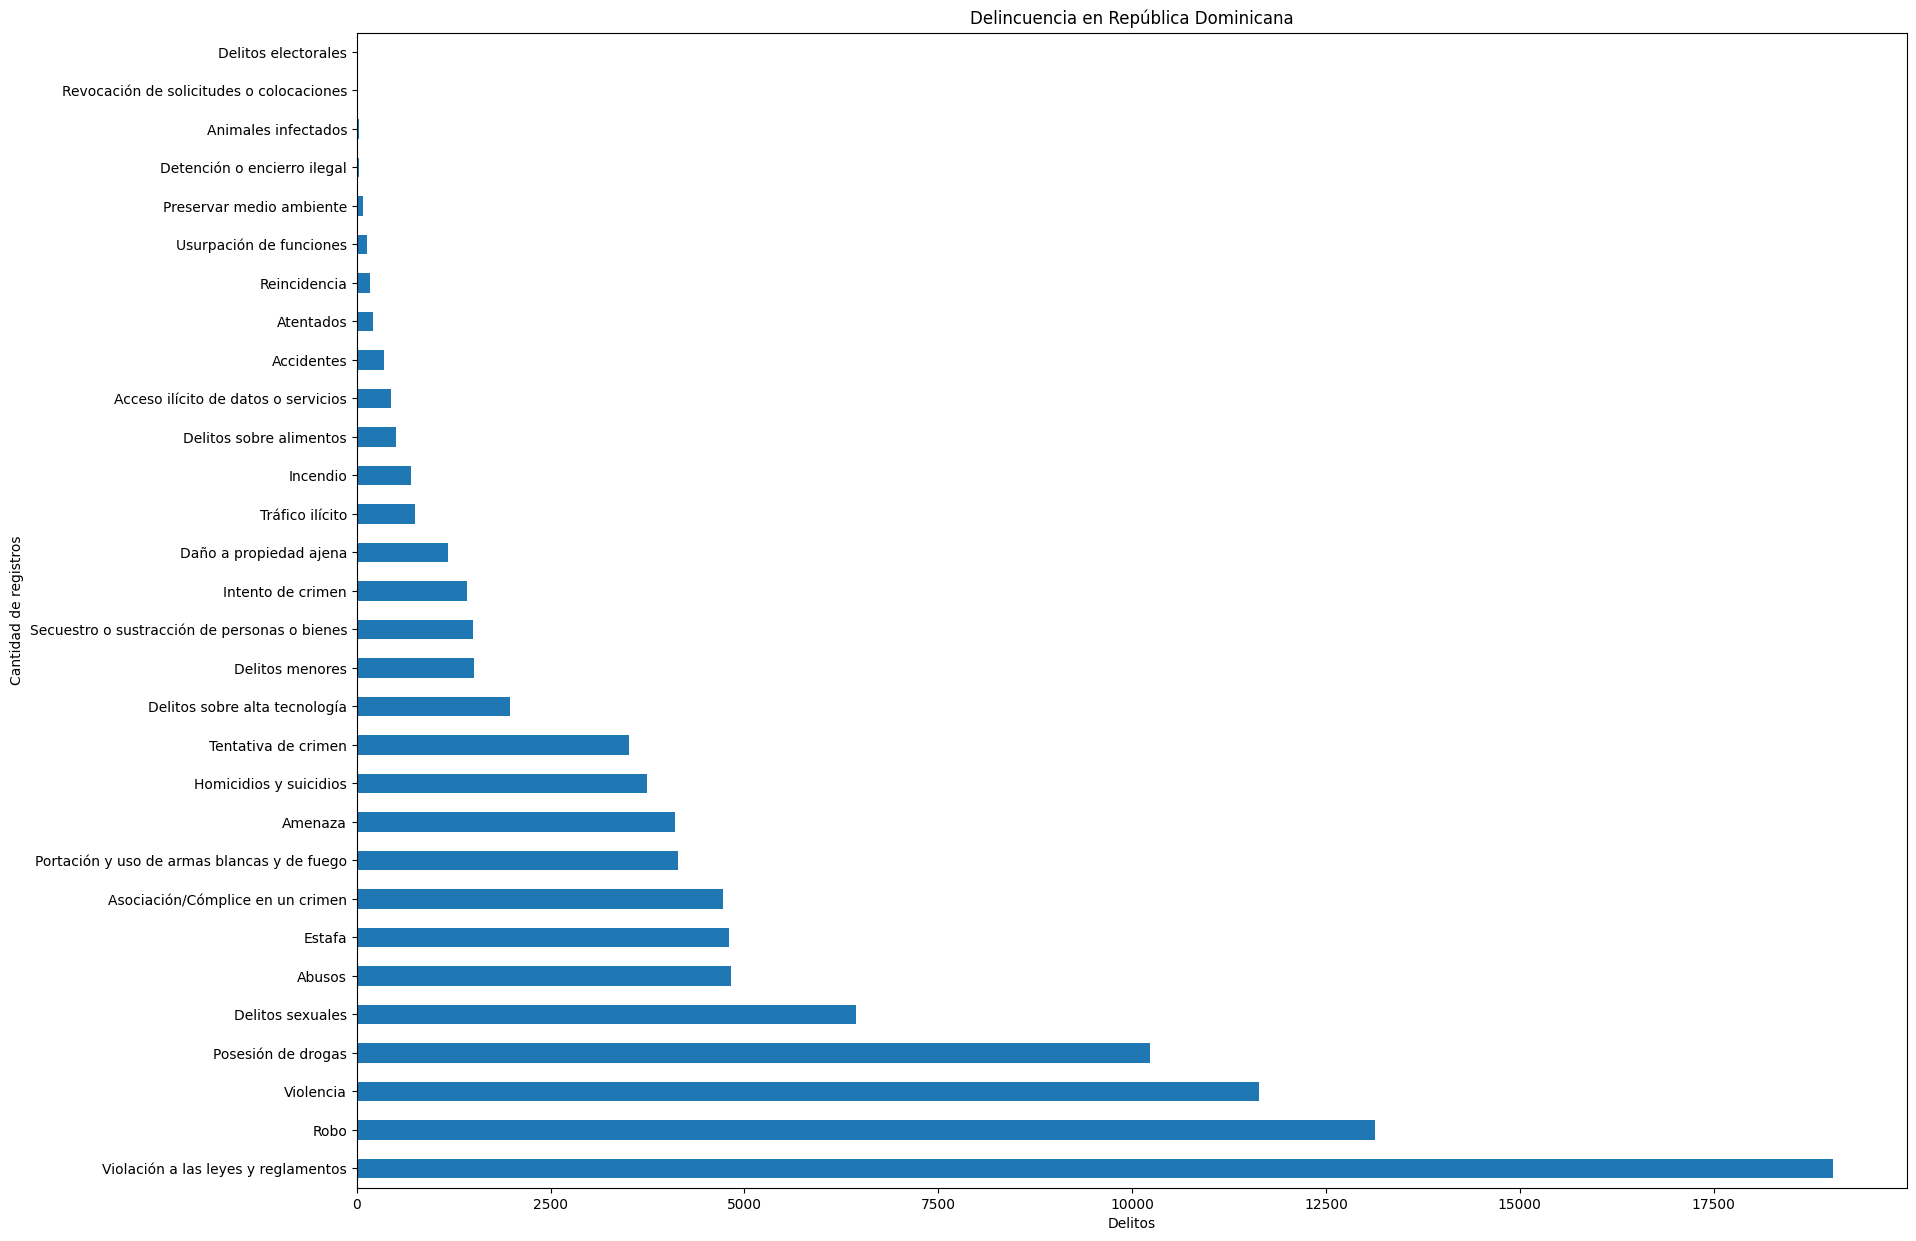

In [212]:
plt.figure(figsize = (20, 15))
df_grafico["Delito"].value_counts().plot(kind='barh')
# d
plt.title("Delincuencia en República Dominicana")
plt.xlabel("Delitos")
plt.ylabel("Cantidad de registros")
plt.show()

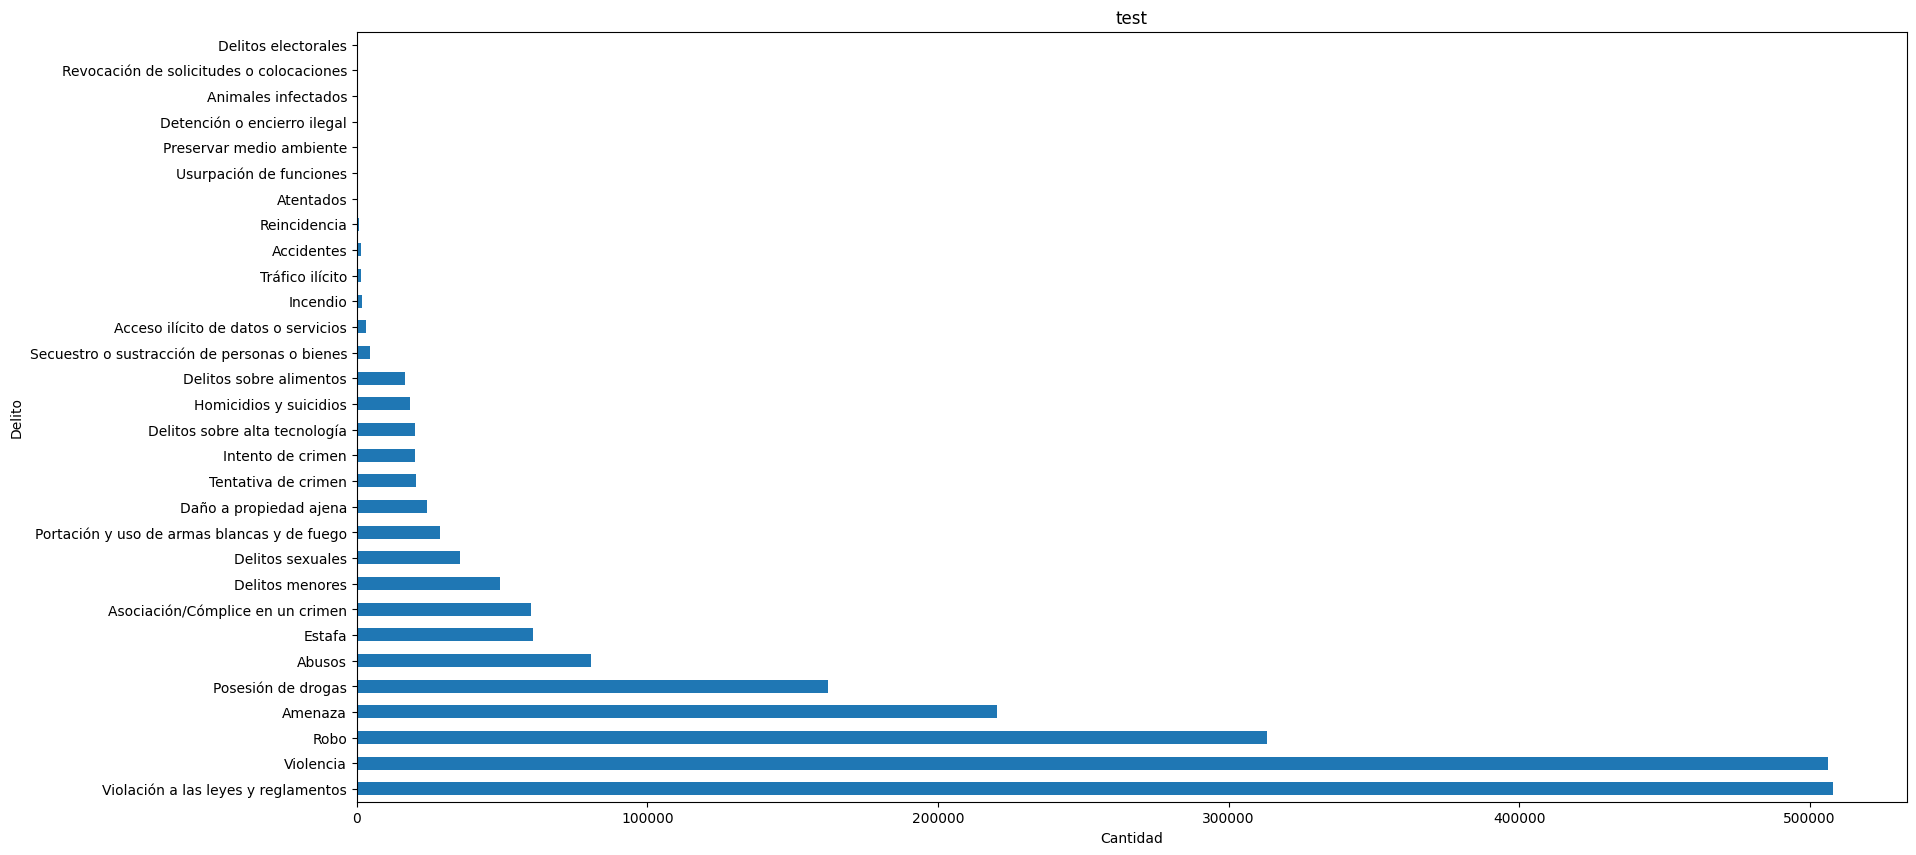

In [213]:
ajustesGraficos(df_grafico, "Delito", 0, (20, 10), 'barh', "test", 'Cantidad', 'Delito')

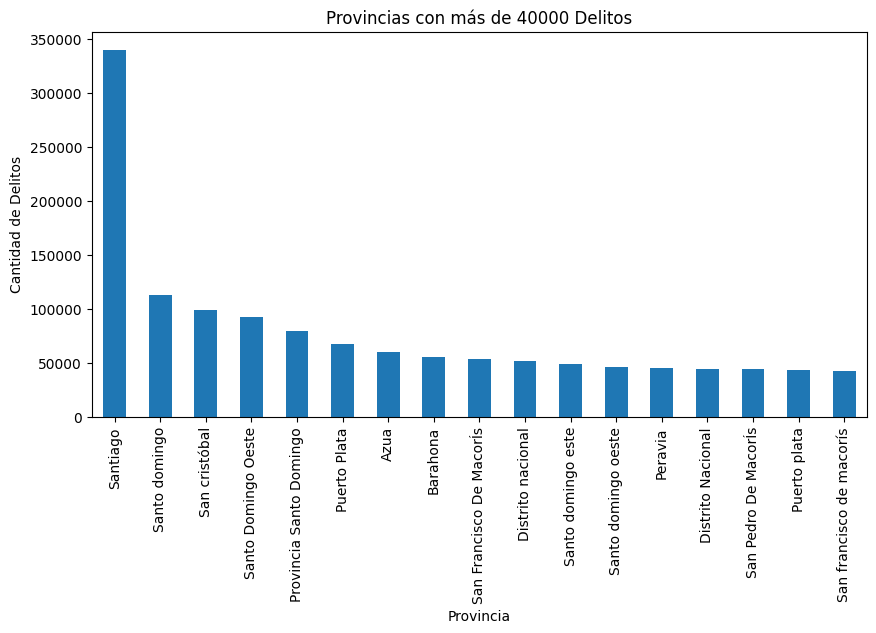

In [216]:
umbral_delitos = 40000 
titulo = f'Provincias con más de {umbral_delitos} Delitos'

ajustesGraficos(df_grafico, "Provincia", umbral_delitos, (10, 5), 'bar', titulo, 'Provincia', 'Cantidad de Delitos')

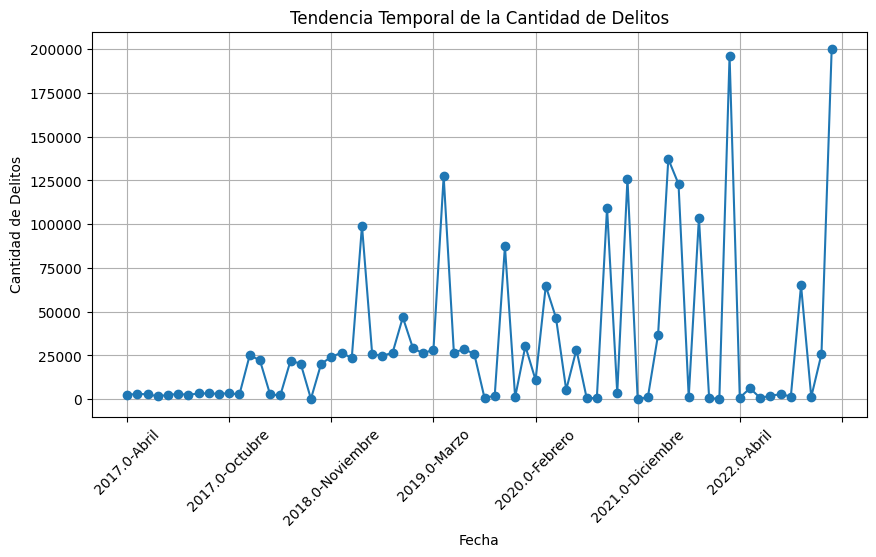

In [217]:
# Gráfico de líneas:
# Tendencia temporal de la cantidad de delitos
plt.figure(figsize=(10, 5))
df_grafico['Fecha'] = df_grafico['Año'].astype(str) + '-' + df_grafico['Mes']
df_grafico.groupby('Fecha')['Cantidad'].sum().plot(kind='line', marker='o')
plt.grid(True)
plt.title('Tendencia Temporal de la Cantidad de Delitos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()

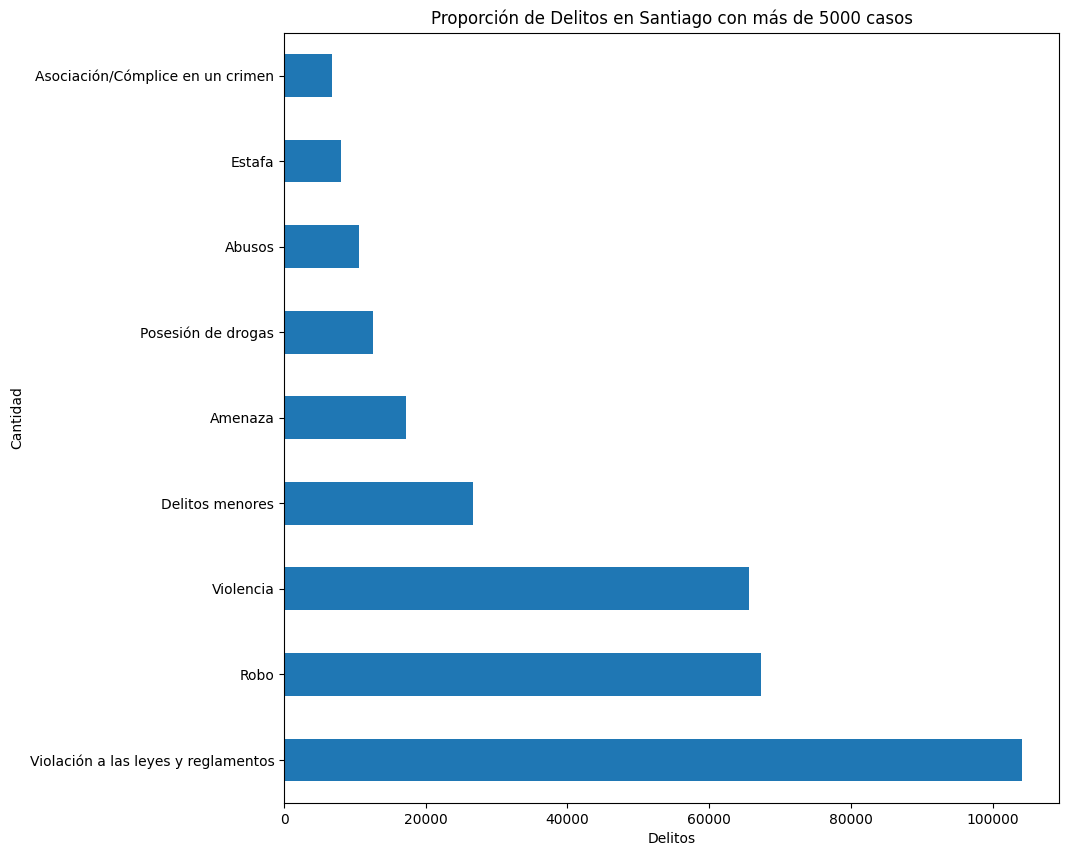

In [218]:
graficarDelitosProvincias(df_grafico, "Santiago", 5000, (10, 10), 'barh', "Delitos", "Cantidad")

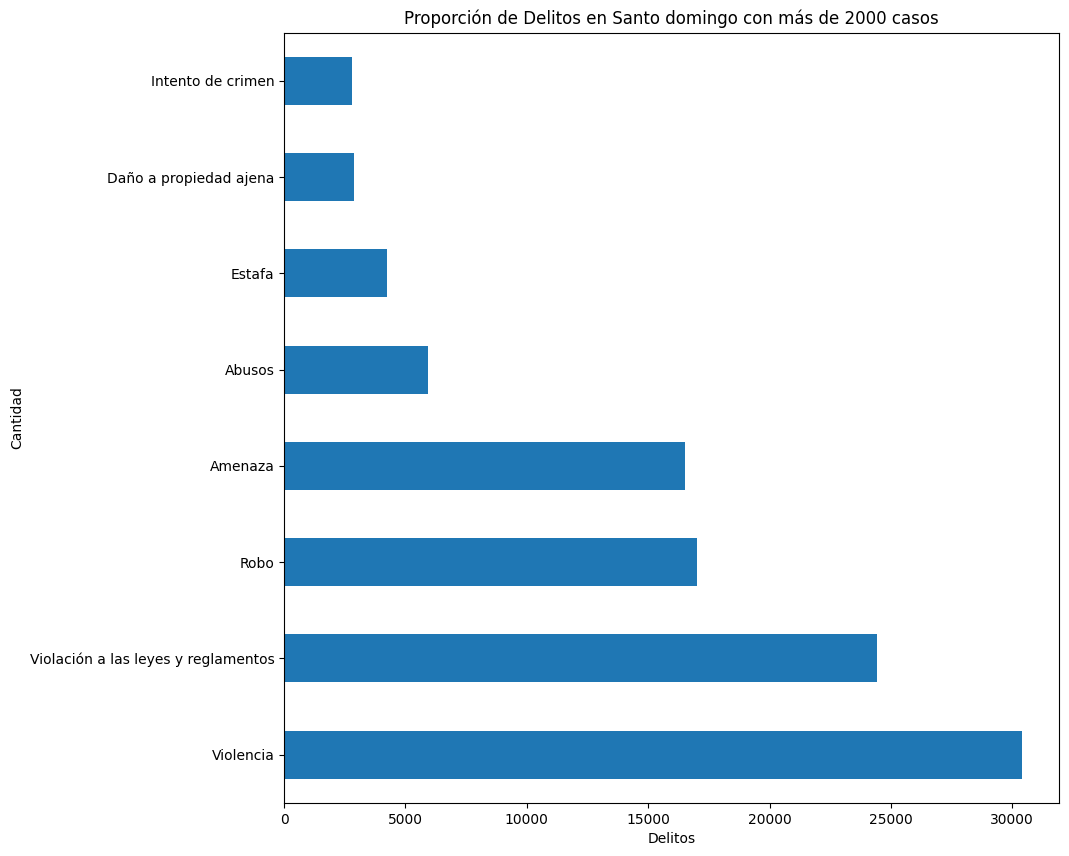

In [202]:
graficarDelitosProvincias(df_grafico, "Santo domingo", 2000, (10, 10), 'barh', "Delitos", "Cantidad")